#  Heart Failure Prediction

In [49]:
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### load dataset

In [50]:
df = pd.read_csv('heart.csv')

In [51]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [52]:
# to display max row and max columns 
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)

In [53]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Checking duplicate data if any

In [55]:
df.duplicated().any()

False

In [56]:
df.describe().round(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [57]:

# checking null values
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [58]:
# checking null values in each column
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [59]:
df.isnull().sum().sum()

0

In [60]:
# draw correlation matrix
df.corr()


C:\Users\Acer\AppData\Local\Temp\ipykernel_17720\3670237301.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


C:\Users\Acer\AppData\Local\Temp\ipykernel_17720\2246648547.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap= 'viridis')  ### annot method is used to annotate the cells of the heatmap with the numeric value of each cell


<Axes: >

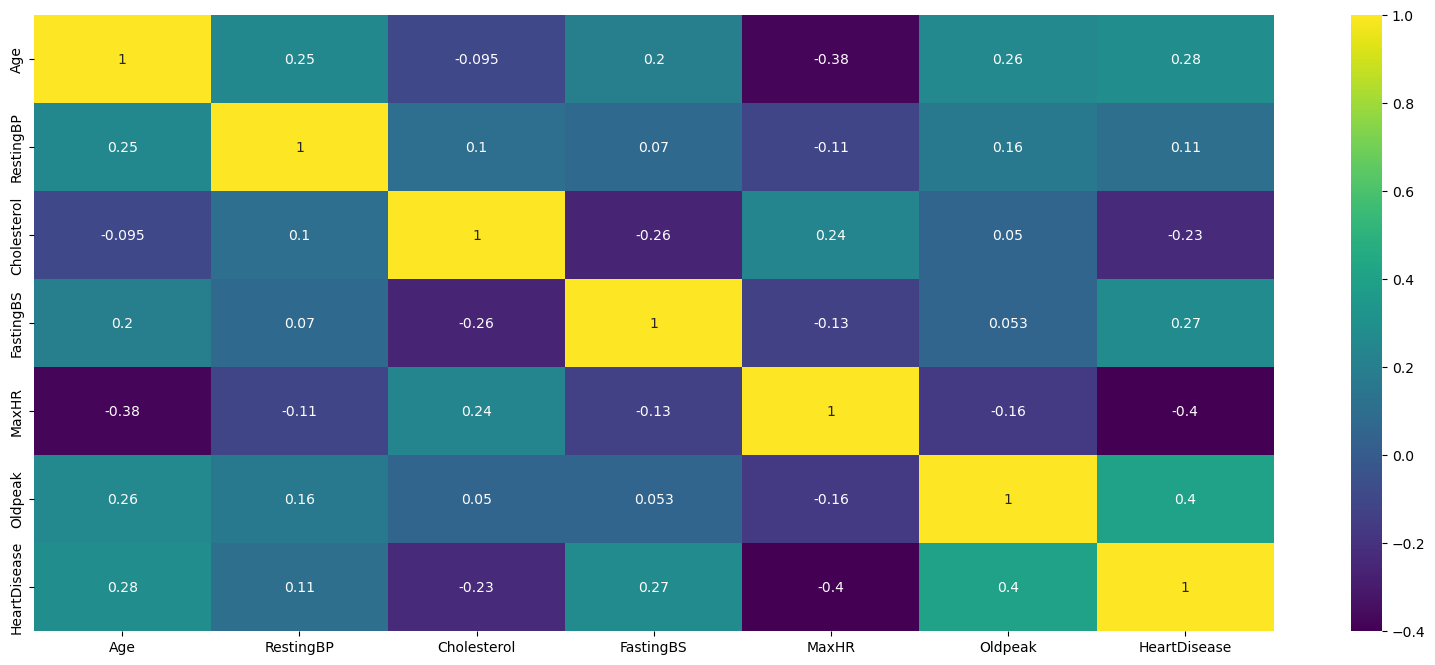

In [61]:
## passing the correlated data in heatmap
plt.figure(figsize=(20,8))

sns.heatmap(df.corr(), annot = True, cmap= 'viridis')  ### annot method is used to annotate the cells of the heatmap with the numeric value of each cell
## cmap is used to specify color map for heatmap

In [62]:
# Renaming columns 
df.rename(columns = {'MaxHR': 'HR MAX'}, inplace=True)

In [63]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

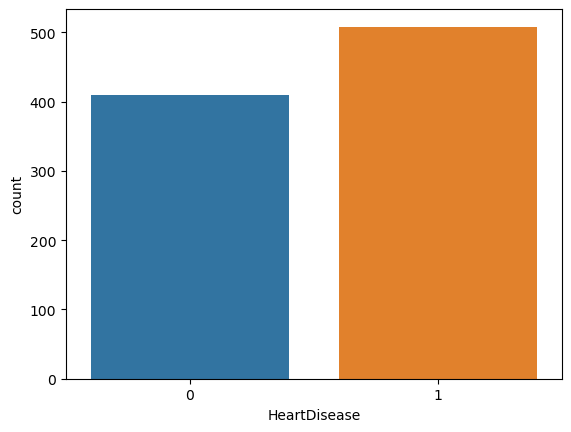

In [64]:
sns.countplot(x = 'HeartDisease', data = df)

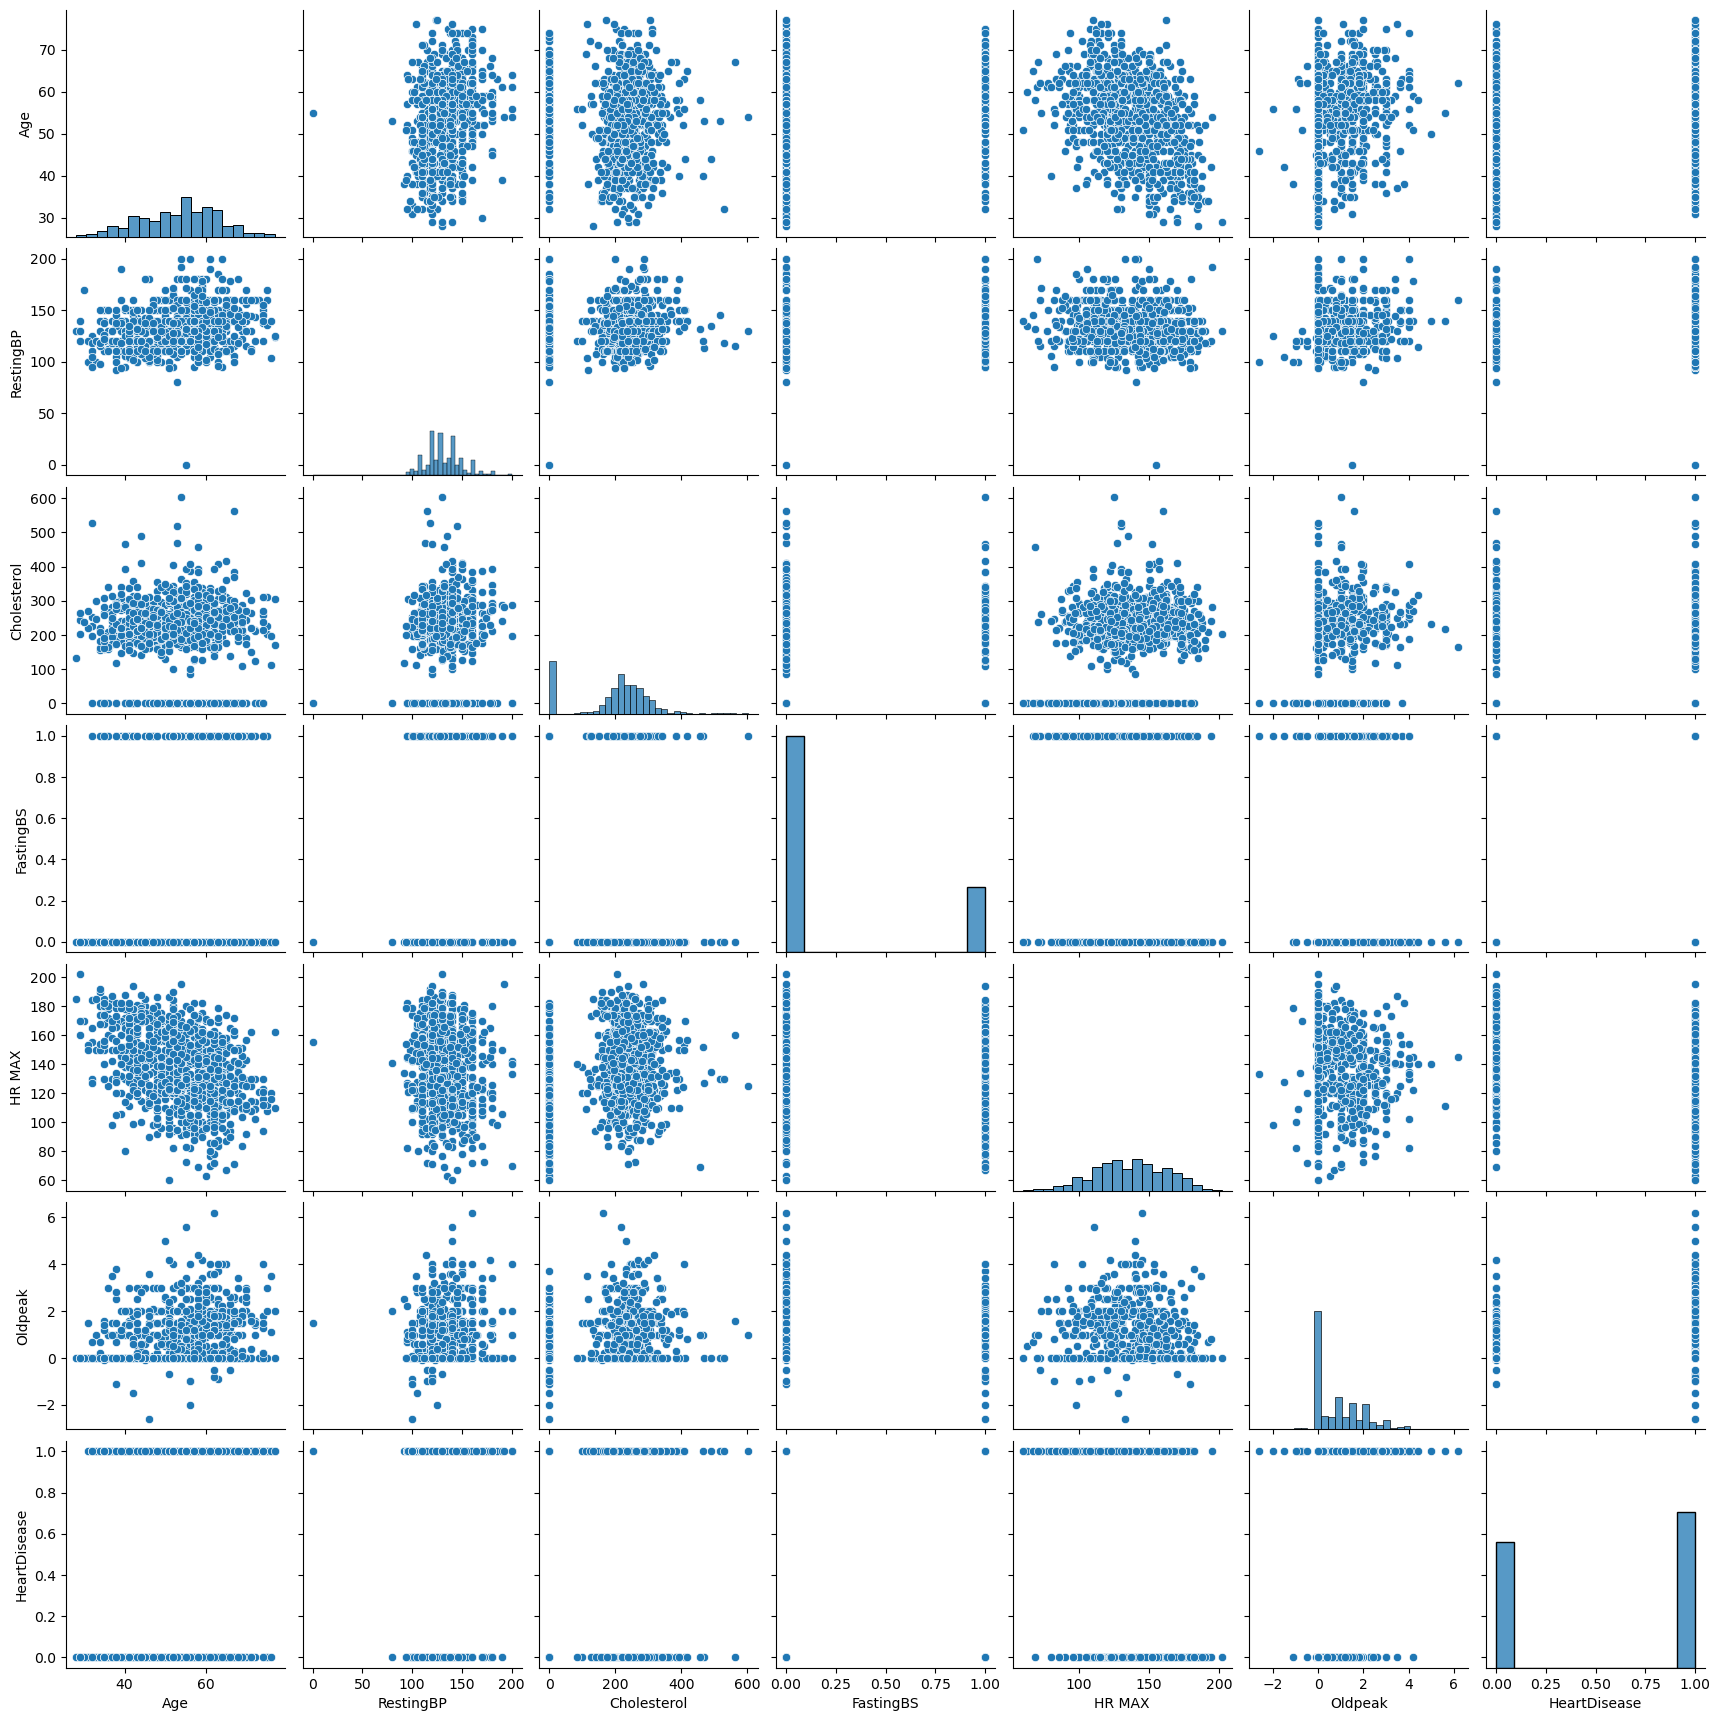

In [65]:
sns.pairplot(df)

In [66]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

([<matplotlib.axis.XTick at 0x23c2b219050>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

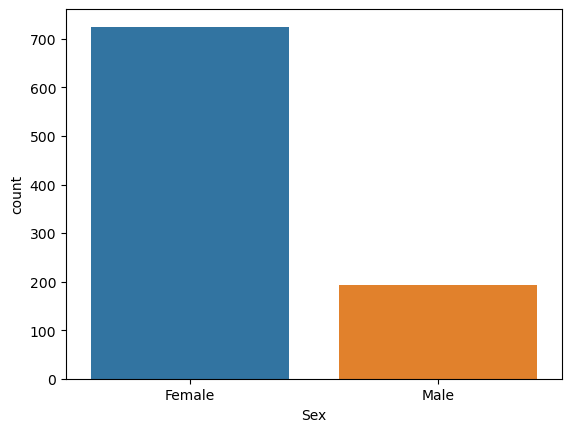

In [67]:
sns.countplot(x ='Sex', data = df)
plt.xticks([0,1],['Female','Male'])

<Axes: xlabel='Sex', ylabel='count'>

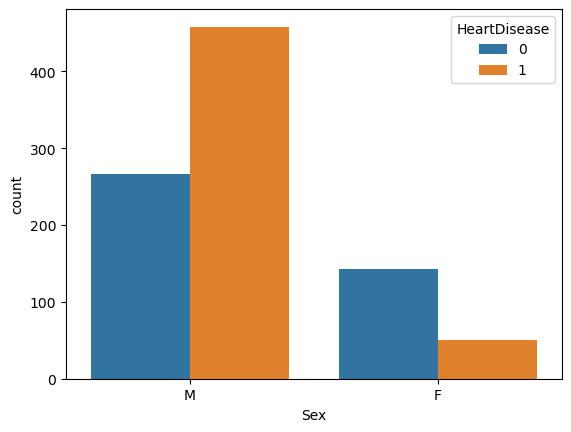

In [68]:
sns.countplot(x = 'Sex', hue = 'HeartDisease', data = df)

C:\Users\Acer\AppData\Local\Temp\ipykernel_17720\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

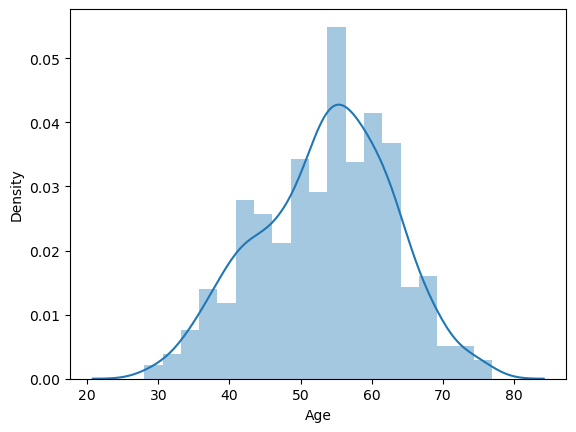

In [69]:
sns.distplot(df['Age'])

<Axes: xlabel='Age', ylabel='Count'>

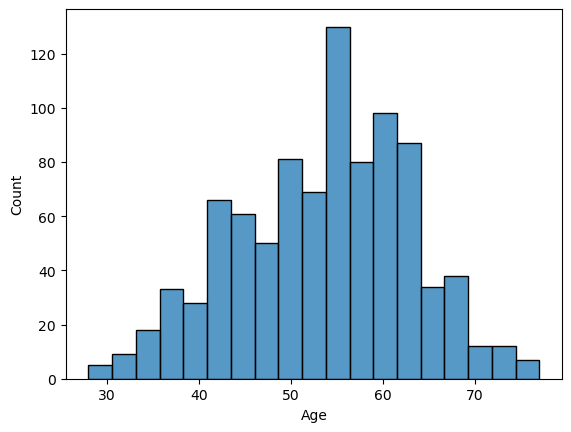

In [70]:
sns.histplot(df['Age'])

In [71]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

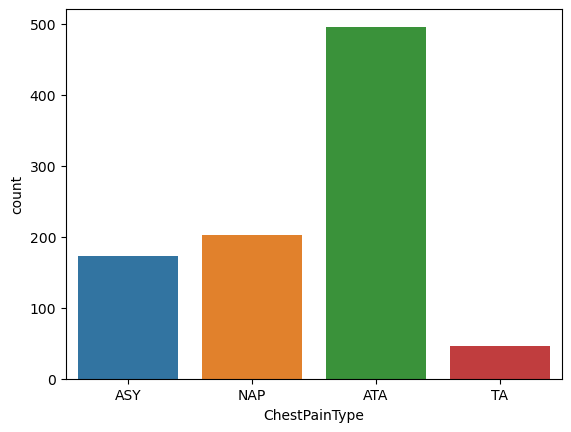

In [72]:
sns.countplot(x = 'ChestPainType', data = df)
plt.xticks([0,1,2,3],['ASY','NAP','ATA','TA'])
plt.show()

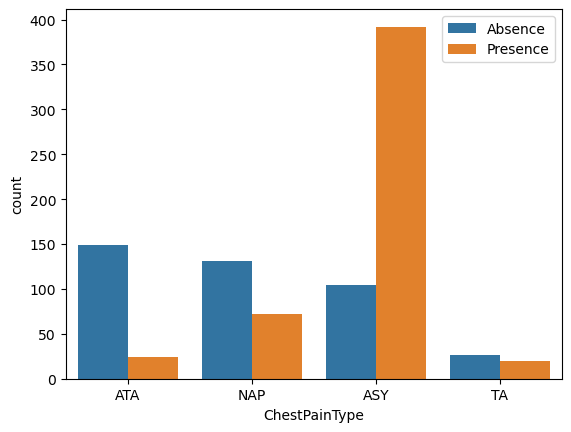

In [73]:
sns.countplot(x = 'ChestPainType', hue = 'HeartDisease', data = df)
plt.legend(labels=['Absence','Presence'])
plt.show()

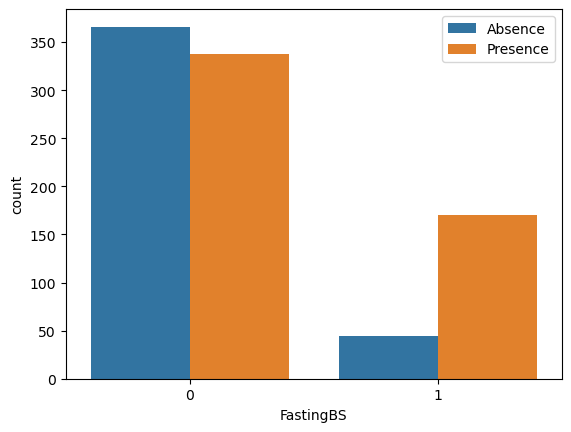

In [74]:
sns.countplot(x = 'FastingBS', hue = 'HeartDisease', data = df)
plt.legend(labels=['Absence','Presence'])
plt.show()

In [75]:
df.sort_values(by = 'Age', ascending = True)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,HR MAX,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
208,28,M,ATA,130,132,0,LVH,185,N,0.0,Up,0
219,29,M,ATA,140,263,0,Normal,170,N,0.0,Up,0
170,29,M,ATA,120,243,0,Normal,160,N,0.0,Up,0
829,29,M,ATA,130,204,0,LVH,202,N,0.0,Up,0
215,30,F,TA,170,237,0,ST,170,N,0.0,Up,0
56,31,M,ASY,120,270,0,Normal,153,Y,1.5,Flat,1
203,31,F,ATA,100,219,0,ST,150,N,0.0,Up,0
35,32,M,ATA,125,254,0,Normal,155,N,0.0,Up,0
67,32,M,ATA,110,225,0,Normal,184,N,0.0,Up,0
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1


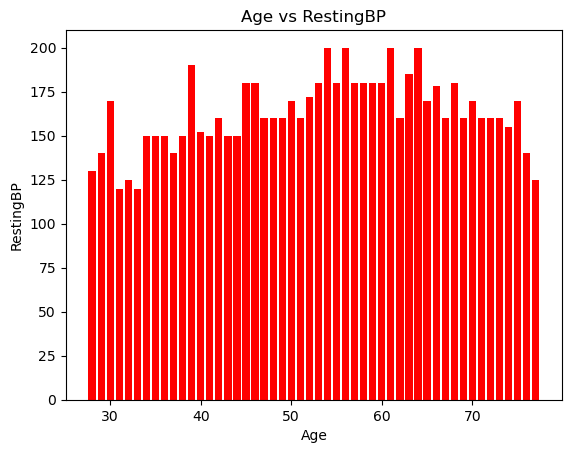

In [76]:
x = df['Age']
y = df['RestingBP']
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.title('Age vs RestingBP')
plt.bar(x,y, color='r')
plt.show()

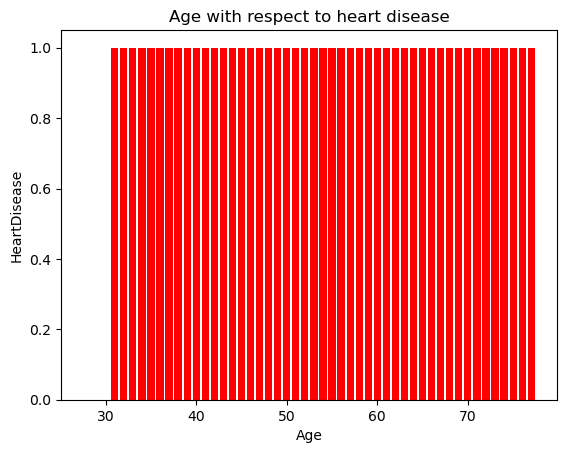

In [77]:
x = df['Age']
y = df['HeartDisease']
plt.xlabel('Age')
plt.ylabel('HeartDisease')
plt.title('Age with respect to heart disease')
plt.bar(x,y, color='r')
plt.show()

<Axes: >

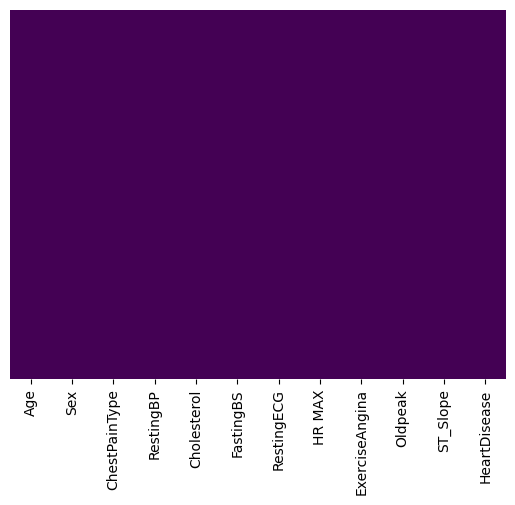

In [78]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis')


In [79]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [80]:
# index
df_ChestPainType = df.ChestPainType.value_counts().index

In [81]:
ChestPainType_values = df.ChestPainType.value_counts().values
ChestPainType_values

array([496, 203, 173,  46], dtype=int64)

<Axes: >

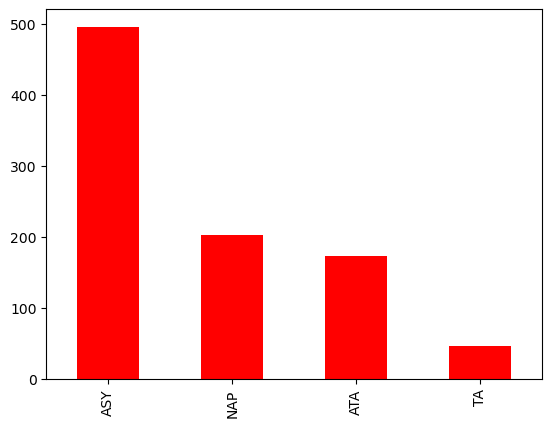

In [82]:
df['ChestPainType'].value_counts().plot(kind = 'bar', color ='r')

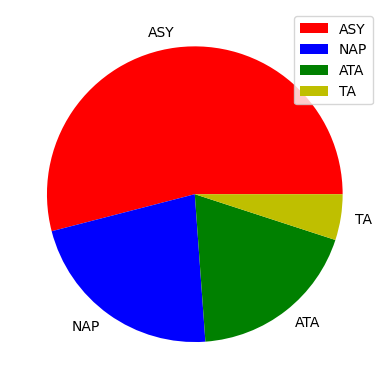

In [83]:
c = ['r','b','g','y']
plt.pie(ChestPainType_values, labels = df_ChestPainType, colors = c)
plt.legend()
plt.show()

In [84]:
df_restingbp_value = df['RestingBP'].value_counts().values
df_restingbp_value

array([132, 118, 107,  58,  55,  50,  29,  20,  19,  18,  18,  17,  17,
        15,  14,  14,  13,  12,  12,  12,  11,  11,  10,   9,   8,   8,
         7,   7,   7,   6,   6,   5,   5,   4,   4,   4,   4,   3,   3,
         3,   3,   3,   3,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1], dtype=int64)

In [85]:
df_restingbp = df['RestingBP'].value_counts().index
df_restingbp

Int64Index([120, 130, 140, 110, 150, 160, 125, 135, 115, 128, 145, 138, 132,
            100, 170, 112, 136, 122, 180, 124, 142, 134, 118, 105, 144, 155,
            152, 108, 126, 133,  95, 139, 137, 158, 200, 146, 131, 141, 102,
            178, 154, 104, 106, 123, 172, 156, 143, 114,  94, 116, 165, 148,
            190, 101, 174, 192, 129, 117,  80, 127,  96,   0, 185,  98,  92,
            113, 164],
           dtype='int64')

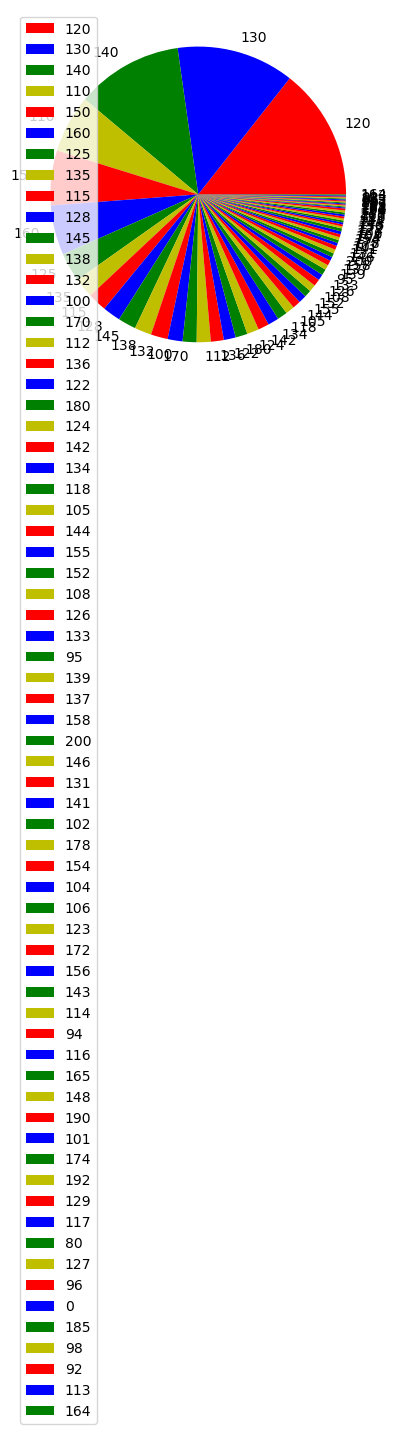

In [86]:
c = ['r','b','g','y']
plt.pie(df_restingbp_value, labels = df_restingbp, colors =c )
plt.legend()
plt.show()

observation2:: restingbp has a very large of indexes so its inconvenient to present it in pie chart this way ... it will be btter if we can make of group and then show in pie

# Data preprocessing

In [94]:
cat_var = df.select_dtypes(include=['object']).keys()

In [95]:
cat_var

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [96]:
num_var = df.select_dtypes(include =['int64','float64']).keys()

In [97]:
num_var

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'HR MAX', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [91]:
# Encoding categorical data
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [98]:
## creating binary values for categorical columns 
df =pd.get_dummies(df, columns= cat_var)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,HR MAX,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler


#

In [ ]:
sc = StandardScaler()  ### creating instance
df[num_var] = sc.fit_transform(df[num_var])

In [ ]:
df.head()

,Age,RestingBP,Cholesterol,HR MAX,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease_0,HeartDisease_1
0,-1.433140,0.410909,0.825070,1.382928,-0.832432,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0
1,-0.478484,1.491752,-0.171961,0.754157,0.105664,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1
2,-1.751359,-0.129513,0.770188,-1.525138,-0.832432,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,0
3,-0.584556,0.302825,0.139040,-1.132156,0.574711,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
4,0.051881,0.951331,-0.034755,-0.581981,-0.832432,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,1,0


### Splitting dataset into training and testing dataset

In [99]:
x= df.drop('HeartDisease', axis=1) #
y = df['HeartDisease']


In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [105]:
y_test

668    0
30     1
377    1
535    1
807    0
793    1
363    1
583    0
165    1
483    1
773    0
551    0
768    0
694    0
718    1
312    1
713    0
309    1
846    1
616    0
355    1
39     0
231    0
822    0
603    1
63     1
192    0
481    1
866    0
67     0
72     1
655    1
679    0
139    1
732    1
824    0
174    1
896    0
499    1
70     1
716    1
23     1
541    1
799    0
672    0
826    0
250    1
752    1
350    1
758    0
759    1
107    0
445    1
141    1
650    1
544    0
110    0
593    1
519    1
907    1
675    0
280    0
136    0
422    1
208    0
442    1
86     1
44     1
531    1
913    1
634    0
290    0
338    1
357    1
292    0
227    1
591    0
425    1
789    0
522    1
861    1
352    1
493    1
60     0
598    1
722    1
426    0
468    1
66     0
332    0
375    1
381    1
557    1
260    0
235    0
218    0
382    1
439    0
762    1
305    1
137    0
538    1
76     1
794    0
436    1
266    1
215    0
334    1
523    1
507    0
209    1
4

In [106]:
# Logistic Regression

In [107]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,HR MAX,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
log = LogisticRegression()
log.fit(x_train, y_train)

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [111]:
y_pre1 = log.predict(x_test)

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy_score(y_test,y_pre1)

0.8532608695652174

### Support vector Classifier (SVC)

In [114]:
from sklearn import svm
svm = svm.SVC()


In [115]:
svm.fit(x_train,y_train)

SVC()

In [116]:
y_pre2 = svm.predict(x_test)

In [117]:
accuracy_score(y_test, y_pre2)

0.6902173913043478

In [164]:
final_DF = pd.DataFrame({'Models':['LR','SVM'], 'ACC': [accuracy_score(y_test, y_pre1), accuracy_score(y_test, y_pre2)]})

In [165]:
final_DF

,Models,ACC
0,LR,0.853261
1,SVM,0.690217


### observation::: Logistic Regression is better than support vector  classifier for our dataset with accuracy around 85%

In [176]:
import seaborn as sns

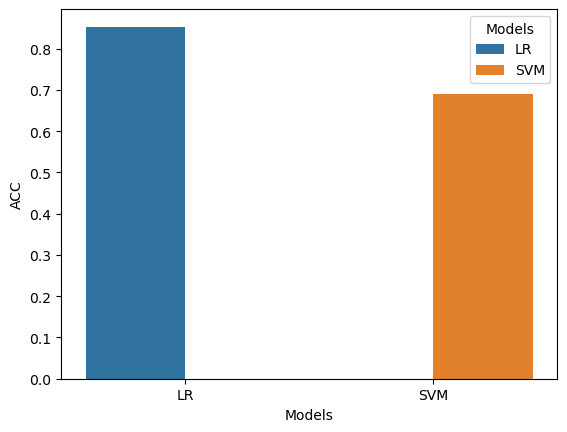

In [181]:
#X = final_DF['Models']
#y = final_DF['ACC']
sns.barplot(x='Models',y ='ACC',hue ='Models', data =final_DF)
plt.show()